# Exploratory Data Analysis in Python: Duke Datathon 2018



## 1. Introduction

In this Jupyter notebook, we conduct an exploratory data analysis of an **SFPD Dispatch dataset**, which contains emergency dispatch information for 10,000 emergency calls in San Francisco from January 2018.  
Jupyter notebooks allow us to run snippets of code at a time instead of entire scripts, which is handy for data analysis. I'll be using Python alongside various tools such as pandas (an open source data science library that loads data into interactive Series and DataFrames, allowing us to query it like one would in SQL) to look for trends in the data, and calculate/display these using numpy, matplotlib and seaborn, other open source Python data science libraries. These are useful because they can directly generate neat visualizations.

## Installs
- https://jupyter.readthedocs.io/en/latest/install.html
- https://pandas.pydata.org/pandas-docs/stable/install.html 
- https://matplotlib.org/users/installing.html
- OR   
- https://www.anaconda.com/download/ 

In [1]:
# Imports
import pandas as pd
import numpy as np

# Press SHIFT + Enter to run a cell 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading & Exploring Data

In [2]:
# Reads a csv, returns a pandas (https://pandas.pydata.org/pandas-docs/stable/) dataframe
df = pd.read_csv('data/sfpd_dispatch_data_subset.csv')
schema_df = pd.read_csv('data/sfpd_dispatch_schema.csv')
# Preview first 5 rows of the pandas dataframe
df.head()

,call_number,unit_id,incident_number,call_type,call_date,watch_date,received_timestamp,entry_timestamp,dispatch_timestamp,response_timestamp,...,number_of_alarms,unit_type,unit_sequence_in_call_dispatch,fire_prevention_district,supervisor_district,neighborhood_district,location,row_id,latitude,longitude
0,180243072,84,18010216,Medical Incident,2018-01-24,2018-01-24,2018-01-24 17:36:16.000000 UTC,2018-01-24 17:38:21.000000 UTC,2018-01-24 17:39:41.000000 UTC,2018-01-24 17:39:45.000000 UTC,...,1,MEDIC,1,7,1,NaN,"(37.77444199483868, -122.5046792231959)",180243072-84,37.774442,-122.504679
1,180240538,61,18010011,Medical Incident,2018-01-24,2018-01-23,2018-01-24 07:05:05.000000 UTC,2018-01-24 07:05:05.000000 UTC,2018-01-24 07:05:31.000000 UTC,2018-01-24 07:05:45.000000 UTC,...,1,MEDIC,1,2,6,NaN,"(37.774094856688166, -122.42000143696421)",180240538-61,37.774095,-122.420001
2,180240176,E22,18009959,Medical Incident,2018-01-24,2018-01-23,2018-01-24 02:04:21.000000 UTC,2018-01-24 02:05:37.000000 UTC,2018-01-24 02:06:04.000000 UTC,2018-01-24 02:07:26.000000 UTC,...,1,ENGINE,1,8,7,NaN,"(37.75521795168784, -122.47554039050351)",180240176-E22,37.755218,-122.475540
3,180243588,E03,18010271,Alarms,2018-01-24,2018-01-24,2018-01-24 20:04:15.000000 UTC,2018-01-24 20:05:12.000000 UTC,2018-01-24 20:05:24.000000 UTC,2018-01-24 20:05:36.000000 UTC,...,1,ENGINE,1,4,2,NaN,"(37.79031930341935, -122.4231629067995)",180243588-E03,37.790319,-122.423163
4,180243590,B03,18010272,Alarms,2018-01-24,2018-01-24,2018-01-24 20:03:08.000000 UTC,2018-01-24 20:05:36.000000 UTC,2018-01-24 20:05:57.000000 UTC,2018-01-24 20:06:56.000000 UTC,...,1,CHIEF,3,3,6,NaN,"(37.77732776352611, -122.39308855968541)",180243590-B03,37.777328,-122.393089


In [3]:
# Nice summary: check features and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
call_number                       10000 non-null int64
unit_id                           10000 non-null object
incident_number                   10000 non-null int64
call_type                         10000 non-null object
call_date                         10000 non-null object
watch_date                        10000 non-null object
received_timestamp                10000 non-null object
entry_timestamp                   10000 non-null object
dispatch_timestamp                10000 non-null object
response_timestamp                9739 non-null object
on_scene_timestamp                8085 non-null object
transport_timestamp               2969 non-null object
hospital_timestamp                2913 non-null object
call_final_disposition            10000 non-null object
available_timestamp               10000 non-null object
address                           10000 non-null object
ci

In [4]:
# Tip: Display full column widths to read schema descriptions
pd.options.display.max_colwidth = 200 
# Preview data schema/dictionary
schema_df.head()

,attribute,type,description
0,call_number,integer,A unique 9-digit number assigned by the 911 Dispatch Center (DEM) to this call. These number are used for both Police and Fire calls.
1,unit_id,string,Unit Identifier. For example E01 for Engine 1 or T01 for Truck 1.
2,incident_number,integer,A unique 8-digit number assigned by DEM to this Fire incident.
3,call_type,string,Type of call the incident falls into. See the list below.
4,call_date,date,Date the call is received at the 911 Dispatch Center. Used for reporting purposes.


In [5]:
# Look at one particular row- returns a "Series"
df['unit_type'].tail()

9995     ENGINE
9996     ENGINE
9997     ENGINE
9998    SUPPORT
9999      MEDIC
Name: unit_type, dtype: object

In [6]:
# Look at a subset of the columns- returns another DataFrame
df[['call_type', 'unit_type']].head(10)

,call_type,unit_type
0,Medical Incident,MEDIC
1,Medical Incident,MEDIC
2,Medical Incident,ENGINE
3,Alarms,ENGINE
4,Alarms,CHIEF
5,Alarms,ENGINE
6,Structure Fire,ENGINE
7,Traffic Collision,MEDIC
8,Alarms,ENGINE
9,Medical Incident,MEDIC


In [7]:
# Get counts (number of occurences) for call type feature
print(df.call_type_group.value_counts())
df['unit_type'].value_counts(normalize = True)

Potentially Life-Threatening    4752
Non Life-threatening            2468
Alarm                           2384
Fire                             392
Name: call_type_group, dtype: int64


ENGINE            0.3589
MEDIC             0.3066
PRIVATE           0.1154
TRUCK             0.0981
CHIEF             0.0726
RESCUE CAPTAIN    0.0272
RESCUE SQUAD      0.0168
SUPPORT           0.0033
INVESTIGATION     0.0011
Name: unit_type, dtype: float64

In [8]:
# View values for one row/one emergency call sample  
df.iloc[0]

call_number                                                     180243072
unit_id                                                                84
incident_number                                                  18010216
call_type                                                Medical Incident
call_date                                                      2018-01-24
watch_date                                                     2018-01-24
received_timestamp                         2018-01-24 17:36:16.000000 UTC
entry_timestamp                            2018-01-24 17:38:21.000000 UTC
dispatch_timestamp                         2018-01-24 17:39:41.000000 UTC
response_timestamp                         2018-01-24 17:39:45.000000 UTC
on_scene_timestamp                         2018-01-24 17:53:42.000000 UTC
transport_timestamp                        2018-01-24 18:16:32.000000 UTC
hospital_timestamp                         2018-01-24 18:44:08.000000 UTC
call_final_disposition                

In [9]:
# View unique values of call_final_disposition
set(df['call_final_disposition'])

{'Against Medical Advice',
 'Cancelled',
 'Code 2 Transport',
 'Code 3 Transport',
 'Fire',
 'Gone on Arrival',
 'Medical Examiner',
 'No Merit',
 'Other',
 'Patient Declined Transport',
 'SFPD',
 'Unable to Locate'}

In [10]:
df['call_type'].describe() # View descriptive statistics for new column- shows percentiles for numerical columns 

count                10000
unique                  17
top       Medical Incident
freq                  6791
Name: call_type, dtype: object

In [11]:
# Sort by a row 
# Hint for library functions- use shift-tab when writing the function to see its arguments 
df.sort_values('number_of_alarms', ascending = False)[['number_of_alarms', 'call_number']].head(10)

,number_of_alarms,call_number
1185,3,180234084
1041,3,180234084
1677,3,180234084
1674,3,180234084
970,3,180234084
899,3,180234084
1497,3,180234084
1246,3,180234084
1613,3,180234084
974,3,180234084


In [12]:
# Place with least amount of alarms (burglaries etc) is indicative of safe place
# Sort in ascending order
df[df['call_type'] == 'Alarms']['zipcode_of_incident'].value_counts(normalize = True, ascending = True) 

94130    0.002828
94127    0.002828
94104    0.005655
94129    0.009425
94116    0.011310
94111    0.014138
94134    0.015080
94158    0.016965
94112    0.019793
94118    0.023563
94131    0.026390
94124    0.026390
94122    0.026390
94123    0.027333
94121    0.027333
94132    0.029218
94117    0.030160
94114    0.039585
94133    0.041470
94107    0.053723
94105    0.056550
94115    0.062205
94108    0.064090
94109    0.066918
94110    0.070688
94103    0.090481
94102    0.139491
Name: zipcode_of_incident, dtype: float64

## 2. Data Manipulation

In [13]:
# Baseball salary dataset
df2 = pd.read_csv('data/baseball_data.csv')
df2.head()

,salary_in_thousands_of_dollars,batting_average,on_base_percentage,number_of_runs,number_of_hits,number_of_doubles,number_of_triples,number_of_home_runs,number_of_runs_batted_in,number_of_walks,number_of_strike_outs,number_of_stolen_bases,number_of_errors,indicator_of_free_agency_eligibility,indicator_of_free_agent_in_1991_1992,indicator_of_arbitration_eligibility,indicator_of_arbitration_in_1991_1992
0,3300,0.272,0.302,69,153,21,4,31.0,104,22,80.0,4,3.0,1.0,0,0.0,0.0
1,2600,0.269,0.335,58,111,17,2,18.0,66,39,69.0,0,3.0,1.0,1,0.0,0.0
2,2500,0.249,0.337,54,115,15,1,17.0,73,63,116.0,6,5.0,1.0,0,0.0,0.0
3,2475,0.260,0.292,59,128,22,7,12.0,50,23,64.0,21,21.0,0.0,0,1.0,0.0
4,2313,0.273,0.346,87,169,28,5,8.0,58,70,53.0,3,8.0,0.0,0,1.0,0.0


### Removing Null Values

In [14]:
# Get a count of columns with null values
print(df2.info())
print ("Number of rows with null values:")
print(df2.isnull().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 17 columns):
salary_in_thousands_of_dollars           337 non-null int64
batting_average                          336 non-null float64
on_base_percentage                       337 non-null float64
number_of_runs                           337 non-null int64
number_of_hits                           337 non-null int64
number_of_doubles                        337 non-null int64
number_of_triples                        337 non-null int64
number_of_home_runs                      336 non-null float64
number_of_runs_batted_in                 337 non-null int64
number_of_walks                          337 non-null int64
number_of_strike_outs                    336 non-null float64
number_of_stolen_bases                   337 non-null int64
number_of_errors                         336 non-null float64
indicator_of_free_agency_eligibility     336 non-null float64
indicator_of_free_agent_in_1991_1992     33

In [15]:
# Use the .notnull() method to find the non NULL rows and store a boolean series.
# Using .isnull() and .any(axis=1) methods chained to a DataFrame will return a series indicating which rows have NULLs
subset = df2[df2.notnull().all(axis=1)]
print ("Number of rows with null values in df3:")
print(subset.isnull().any(axis=1).sum())

Number of rows with null values in df3:
0


In [16]:
df2['batting_average'].describe()

count    336.000000
mean       0.257690
std        0.039528
min        0.063000
25%        0.238000
50%        0.260000
75%        0.281000
max        0.457000
Name: batting_average, dtype: float64

### Apply Functions to Columns

In [17]:
# Applying a function on current column to create a new one 
def assign_batting_category(x): 
    if x <= np.mean(df2['batting_average']): 
        return 'Low'
    else: 
        return 'High'        
    
df2['new_column_batting_category'] = df2['batting_average'].apply(assign_batting_category)
df2[['batting_average', 'new_column_batting_category']].tail(10)

,batting_average,new_column_batting_category
327,0.252,Low
328,0.264,High
329,0.269,High
330,0.194,Low
331,0.213,Low
332,0.111,Low
333,0.264,High
334,0.187,Low
335,0.264,High
336,0.258,High


In [18]:
# Do the same with a lambda function! 
df2['salary_in_dollars'] = df2['salary_in_thousands_of_dollars'].apply(lambda x: x*1000)
df2[['salary_in_thousands_of_dollars', 'salary_in_dollars']].head()

,salary_in_thousands_of_dollars,salary_in_dollars
0,3300,3300000
1,2600,2600000
2,2500,2500000
3,2475,2475000
4,2313,2313000


### Sampling 

In [19]:
# You can use random state for reproducibility
# n = 50
df_sample = df2.sample(frac= 0.1, replace = False) # Sampling with replacement or not 
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 97 to 292
Data columns (total 19 columns):
salary_in_thousands_of_dollars           34 non-null int64
batting_average                          33 non-null float64
on_base_percentage                       34 non-null float64
number_of_runs                           34 non-null int64
number_of_hits                           34 non-null int64
number_of_doubles                        34 non-null int64
number_of_triples                        34 non-null int64
number_of_home_runs                      34 non-null float64
number_of_runs_batted_in                 34 non-null int64
number_of_walks                          34 non-null int64
number_of_strike_outs                    33 non-null float64
number_of_stolen_bases                   34 non-null int64
number_of_errors                         34 non-null float64
indicator_of_free_agency_eligibility     34 non-null float64
indicator_of_free_agent_in_1991_1992     34 non-null int6

## 5. Visualizations

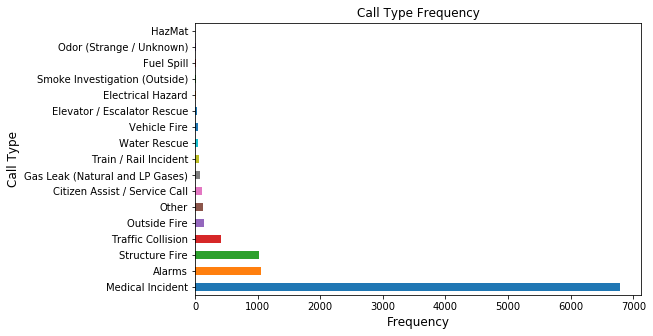

In [20]:
# Plot counts
df['call_type'].value_counts()[:20].plot(kind='barh', figsize=[8,5])
plt.xlabel('Frequency', fontsize = 12)
plt.title('Call Type Frequency')
plt.ylabel('Call Type', fontsize = 12)

#plt.savefig('types.png')
plt.show()

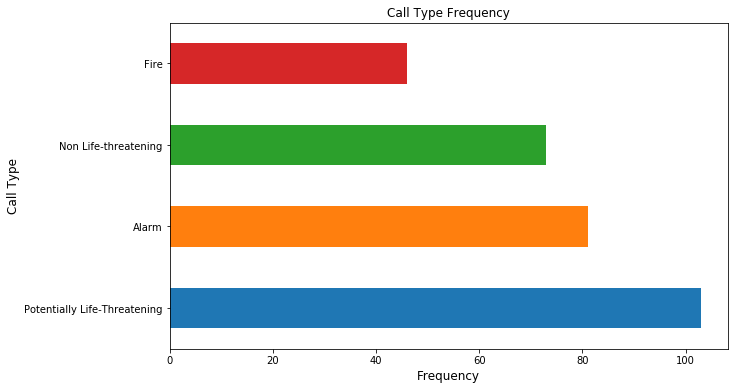

In [21]:
def plot_value_count(df):
    df['call_type_group'].value_counts()[:20].plot(kind='barh', figsize=[10,6])
    plt.xlabel('Frequency', fontsize = 12)
    plt.title('Call Type Frequency')
    plt.ylabel('Call Type', fontsize = 12)
    
plot_value_count(df[df.zipcode_of_incident == 94105])

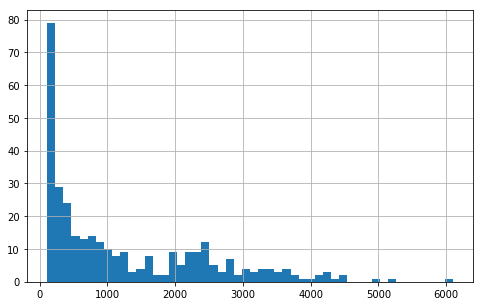

In [22]:
subset.salary_in_thousands_of_dollars.hist(bins=50, figsize=(8, 5))

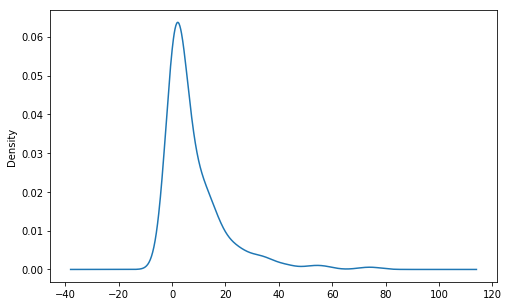

In [23]:
subset.number_of_stolen_bases.plot(kind='kde', figsize=(8, 5))

### Scatter Plots

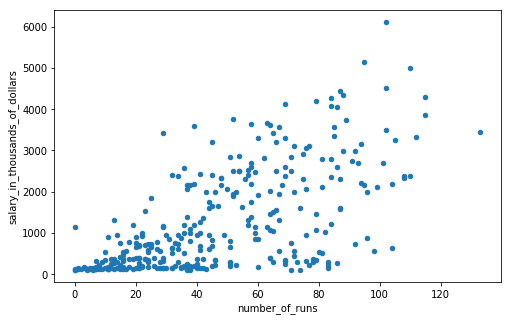

In [24]:
subset.plot(y='salary_in_thousands_of_dollars', x='number_of_runs', kind='scatter', figsize=(8, 5))

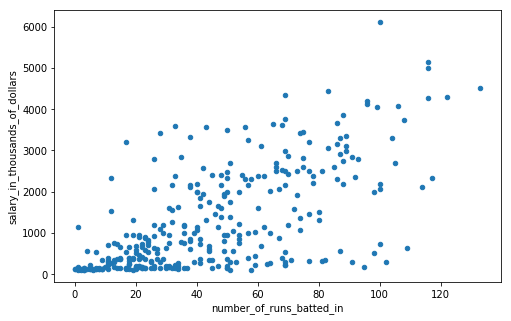

In [25]:
subset.plot(y='salary_in_thousands_of_dollars', x='number_of_runs_batted_in', kind='scatter', figsize=(8, 5))

### Review Pairwise Correlations

In [26]:
# Look for correlations with the target.
# For those things which are highly correlated with the target look at other highly correlated variables.
# Be aware of these relationships they can cause problems with the regression model.

subset.corr()

,salary_in_thousands_of_dollars,batting_average,on_base_percentage,number_of_runs,number_of_hits,number_of_doubles,number_of_triples,number_of_home_runs,number_of_runs_batted_in,number_of_walks,number_of_strike_outs,number_of_stolen_bases,number_of_errors,indicator_of_free_agency_eligibility,indicator_of_free_agent_in_1991_1992,indicator_of_arbitration_eligibility,indicator_of_arbitration_in_1991_1992
salary_in_thousands_of_dollars,1.000000,0.283580,0.322539,0.641338,0.619748,0.570451,0.230557,0.580694,0.663174,0.561404,0.388942,0.255227,0.119817,0.560690,0.091020,0.131811,0.110487
batting_average,0.283580,1.000000,0.809549,0.457975,0.530750,0.468879,0.277290,0.218202,0.384554,0.294073,0.086305,0.212834,0.165368,0.063895,-0.039993,0.101613,0.082035
on_base_percentage,0.322539,0.809549,1.000000,0.521427,0.463980,0.408562,0.202286,0.307042,0.400790,0.594768,0.209310,0.237652,0.110562,0.169376,-0.048074,0.019582,0.041491
number_of_runs,0.641338,0.457975,0.521427,1.000000,0.921601,0.830393,0.543567,0.684038,0.833522,0.826047,0.679690,0.522459,0.345574,0.292638,-0.017005,0.139462,0.111518
number_of_hits,0.619748,0.530750,0.463980,0.921601,1.000000,0.888355,0.539354,0.615871,0.852328,0.719158,0.640469,0.422156,0.420118,0.286690,0.025115,0.182518,0.127392
number_of_doubles,0.570451,0.468879,0.408562,0.830393,0.888355,1.000000,0.411355,0.632714,0.823170,0.636392,0.592094,0.288809,0.339651,0.216448,-0.024156,0.196625,0.148687
number_of_triples,0.230557,0.277290,0.202286,0.543567,0.539354,0.411355,1.000000,0.126278,0.330715,0.302754,0.322936,0.516588,0.197024,0.059262,-0.008118,0.143528,0.065188
number_of_home_runs,0.580694,0.218202,0.307042,0.684038,0.615871,0.632714,0.126278,1.000000,0.876595,0.621642,0.747430,0.087330,0.153751,0.283777,-0.047857,0.046790,0.054662
number_of_runs_batted_in,0.663174,0.384554,0.400790,0.833522,0.852328,0.823170,0.330715,0.876595,1.000000,0.722587,0.741437,0.208985,0.296153,0.295120,0.007218,0.127923,0.098781
number_of_walks,0.561404,0.294073,0.594768,0.826047,0.719158,0.636392,0.302754,0.621642,0.722587,1.000000,0.661965,0.354389,0.247937,0.339749,0.003899,0.031506,0.029247


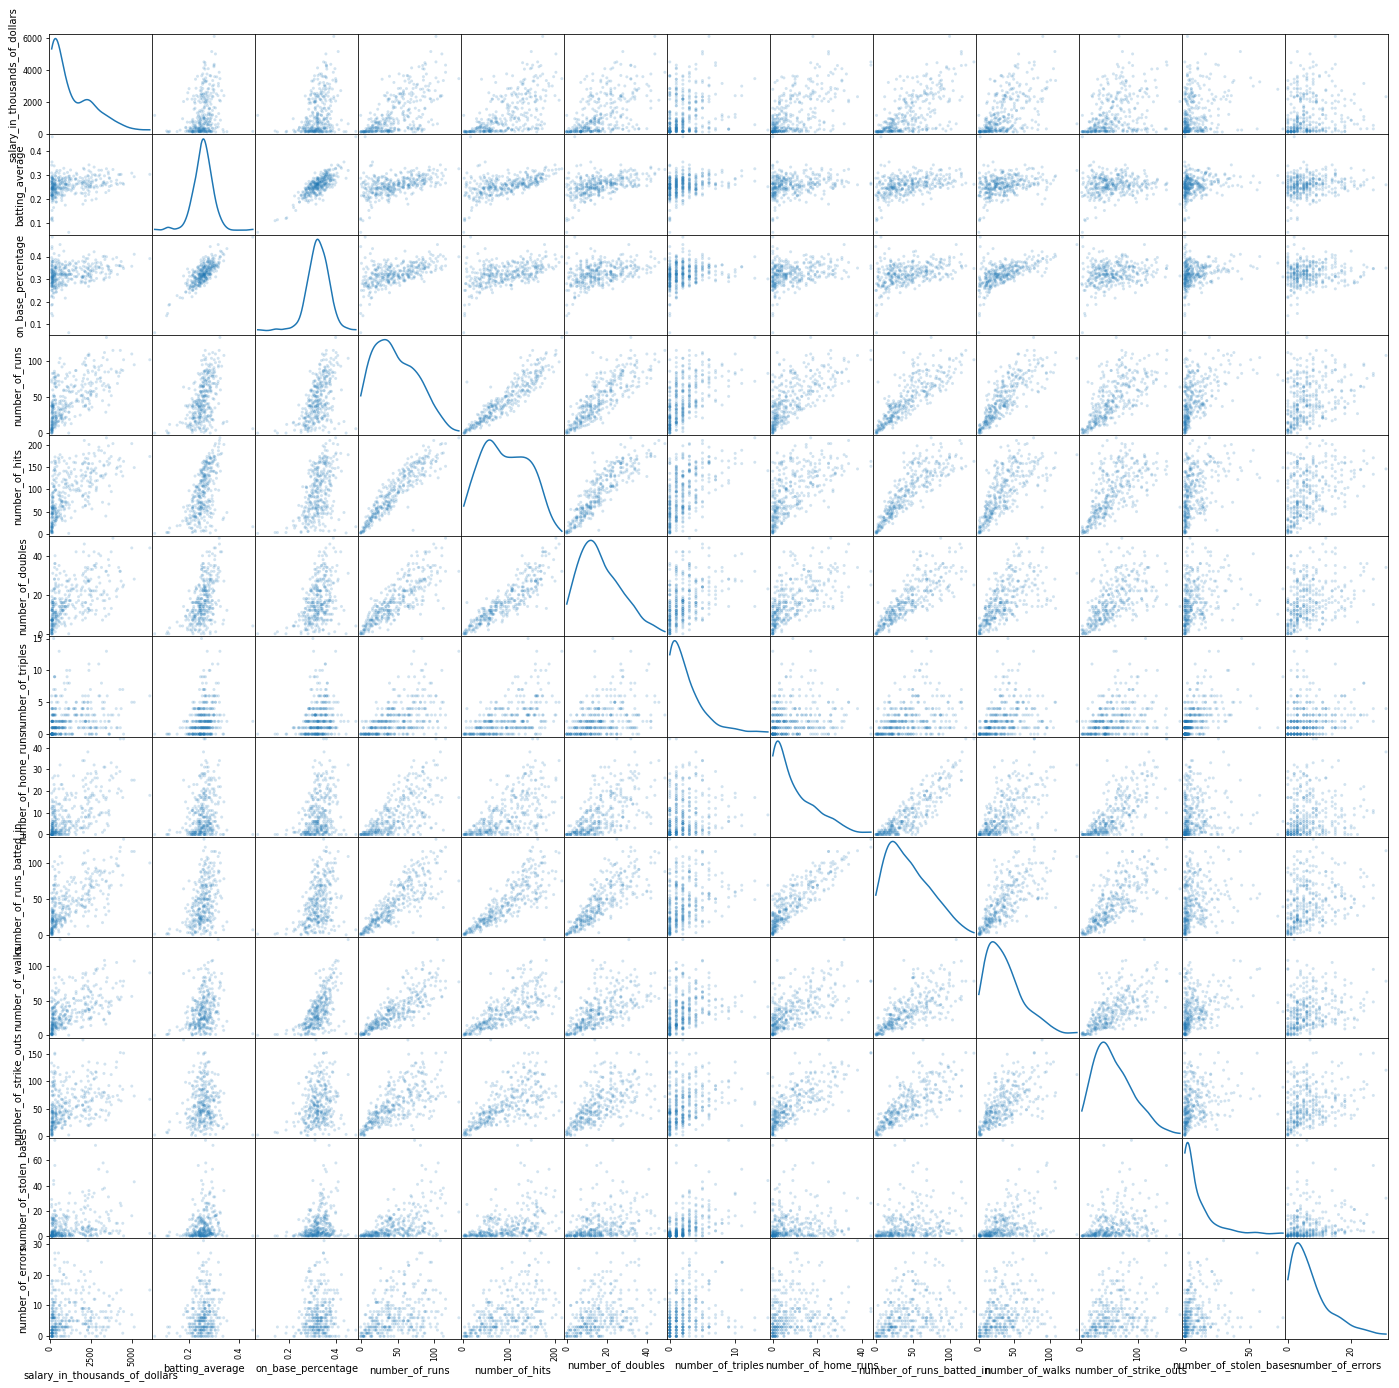

In [27]:
pd.plotting.scatter_matrix(subset.iloc[:,:-4], alpha=0.2, figsize=(24, 24), diagonal='kde');